In [1]:
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

2025-04-22 23:20:10.852692: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-04-22 23:20:10.854574: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 23:20:10.876292: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-04-22 23:20:10.901173: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1745374810.924221  250826 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1745374810.93

In [26]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [27]:
X_train, X_valid = x_train[:50000] / 255., x_train[50000:] / 255.
y_train, y_valid = y_train[:50000], y_train[50000:]

In [29]:
print(X_train.shape, X_valid.shape, x_test.shape)

(50000, 28, 28) (10000, 28, 28) (10000, 28, 28)


In [30]:
# y_test = keras.utils.to_categorical(y_test, num_classes=len(set(y_train)))
# y_train = keras.utils.to_categorical(y_train, num_classes=len(set(y_train)))
print(y_train.shape, y_valid.shape, y_test.shape)

(50000,) (10000,) (10000,)


In [31]:
nn = keras.models.Sequential()
nn.add(keras.Input(shape=(28, 28)))
nn.add(keras.layers.Flatten())
nn.add(keras.layers.Dense(300, activation='relu'))
nn.add(keras.layers.Dense(100, activation='relu'))
nn.add(keras.layers.Dense(50, activation='relu'))
nn.add(keras.layers.Dense(10, activation='softmax'))
nn.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │           510 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271,160 (1.03 MB)

 Trainable params: 271,160 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
nn.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.01), 
    loss='sparse_categorical_crossentropy', 
    metrics=['accuracy']
)

In [34]:
history = nn.fit(X_train, y_train, epochs=1, validation_data=(X_valid, y_valid))

1563/1563 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.6402 - loss: 1.2257 - val_accuracy: 0.9133 - val_loss: 0.2941


<Axes: >

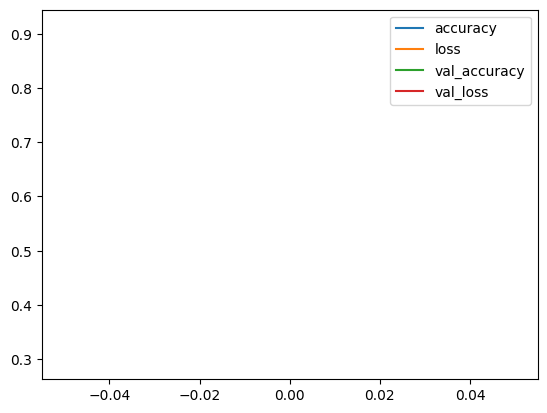

In [35]:
df_history = pd.DataFrame(history.history)
df_history.plot()